# Bibliotecas

In [667]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [668]:
# Configurações

pd.set_option('display.max_columns', 100)
sns.set_style('darkgrid')

# Base de Dados

In [669]:
dados = pd.read_json('dataset_telecon.json')

In [670]:
dados

,id_cliente,Churn,cliente,telefone,internet,conta
0,0002-ORFBO,nao,"{'genero': 'feminino', 'idoso': 0, 'parceiro':...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'DSL', 'seguranca_online'...","{'contrato': None, 'faturamente_eletronico': N..."
1,0003-MKNFE,nao,"{'genero': 'masculino', 'idoso': 0, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'DSL', 'seguranca_online'...","{'contrato': 'mes a mes', 'faturamente_eletron..."
2,0004-TLHLJ,sim,"{'genero': 'masculino', 'idoso': 0, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'fibra otica', 'seguranca...","{'contrato': 'mes a mes', 'faturamente_eletron..."
3,0011-IGKFF,sim,"{'genero': 'masculino', 'idoso': 1, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'fibra otica', 'seguranca...","{'contrato': 'mes a mes', 'faturamente_eletron..."
4,0013-EXCHZ,sim,"{'genero': 'feminino', 'idoso': 1, 'parceiro':...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'fibra otica', 'seguranca...","{'contrato': 'mes a mes', 'faturamente_eletron..."
...,...,...,...,...,...,...
7339,5172-RKOCB,nao,"{'genero': 'masculino', 'idoso': 0, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'fibra otica', 'seguranca...","{'contrato': 'dois anos', 'faturamente_eletron..."
7340,1934-MKPXS,nao,"{'genero': 'masculino', 'idoso': 0, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'nao', 'seguranca_online'...","{'contrato': 'um ano', 'faturamente_eletronico..."
7341,5959-BELXA,sim,"{'genero': 'masculino', 'idoso': 1, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'fibra otica', 'seguranca...","{'contrato': 'mes a mes', 'faturamente_eletron..."
7342,3601-UTZXO,,"{'genero': 'masculino', 'idoso': 0, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'nao', 'seguranca_online'...","{'contrato': 'um ano', 'faturamente_eletronico..."


## Transformando dados em uma tabela

In [671]:
with open('dataset_telecon.json', 'r') as f:
    json_bruto = json.load(f)

In [672]:
dados = pd.json_normalize(json_bruto)

In [673]:
dados.head()

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,internet.seguranca_online,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,0002-ORFBO,nao,feminino,0,sim,sim,9.0,sim,nao,DSL,nao,sim,nao,sim,sim,nao,None,None,None,NaN,None
1,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,nao,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.9,542.4
2,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,nao,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.9,280.85
3,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,nao,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.0,1237.85
4,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,nao,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.9,267.4


In [674]:
dados.columns = dados.columns.str.replace('.','_').str.replace('conta_','').str.replace('cliente_','').str.replace('telefone_','').str.replace('internet_','').str.lower()

In [675]:
colunas = dados.columns

novas_colunas = ['id_cliente', 'genero', 'idoso', 'parceiro', 'dependentes', 
                 'tempo_servico', 'servico_telefone', 'varias_linhas', 
                 'servico_internet', 'seguranca_online', 'backup_online', 
                 'protecao_dispositivo', 'suporte_tecnico', 'tv_streaming', 
                 'filmes_streaming', 'contrato', 'faturamente_eletronico', 
                 'metodo_pagamento', 'cobranca_mensal', 'cobranca_total', 'churn']
dados = dados[novas_colunas]

In [676]:
dados.head()

,id_cliente,genero,idoso,parceiro,dependentes,tempo_servico,servico_telefone,varias_linhas,servico_internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_streaming,filmes_streaming,contrato,faturamente_eletronico,metodo_pagamento,cobranca_mensal,cobranca_total,churn
0,0002-ORFBO,feminino,0,sim,sim,9.0,sim,nao,DSL,nao,sim,nao,sim,sim,nao,None,None,None,NaN,None,nao
1,0003-MKNFE,masculino,0,nao,nao,9.0,sim,sim,DSL,nao,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.9,542.4,nao
2,0004-TLHLJ,masculino,0,nao,nao,4.0,sim,nao,fibra otica,nao,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.9,280.85,sim
3,0011-IGKFF,masculino,1,sim,nao,13.0,sim,nao,fibra otica,nao,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.0,1237.85,sim
4,0013-EXCHZ,feminino,1,sim,nao,3.0,sim,nao,fibra otica,nao,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.9,267.4,sim


In [677]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7344 entries, 0 to 7343
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_cliente              7344 non-null   object 
 1   genero                  7344 non-null   object 
 2   idoso                   7344 non-null   int64  
 3   parceiro                7344 non-null   object 
 4   dependentes             7344 non-null   object 
 5   tempo_servico           7336 non-null   float64
 6   servico_telefone        7344 non-null   object 
 7   varias_linhas           7344 non-null   object 
 8   servico_internet        7344 non-null   object 
 9   seguranca_online        7344 non-null   object 
 10  backup_online           7344 non-null   object 
 11  protecao_dispositivo    7344 non-null   object 
 12  suporte_tecnico         7344 non-null   object 
 13  tv_streaming            7344 non-null   object 
 14  filmes_streaming        7344 non-null   

In [678]:
# dados['cobranca_total'] = dados['cobranca_total'].astype(float)

In [679]:
dados[dados['cobranca_total'] == ' '].head()

,id_cliente,genero,idoso,parceiro,dependentes,tempo_servico,servico_telefone,varias_linhas,servico_internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_streaming,filmes_streaming,contrato,faturamente_eletronico,metodo_pagamento,cobranca_mensal,cobranca_total,churn
975,1371-DWPAZ,feminino,0,sim,sim,0.0,nao,sem servico de telefone,DSL,sim,sim,sim,sim,sim,nao,dois anos,nao,cartao de credito (automatico),56.05,,nao
1775,2520-SGTTA,feminino,0,sim,sim,0.0,sim,nao,nao,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,nao,cheque pelo correio,20.00,,nao
1955,2775-SEFEE,masculino,0,nao,sim,0.0,sim,sim,DSL,sim,sim,nao,sim,nao,nao,dois anos,sim,transferencia bancaria (automatica),61.90,,nao
2075,2923-ARZLG,masculino,0,sim,sim,0.0,sim,nao,nao,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,sim,cheque pelo correio,19.70,,nao
2232,3115-CZMZD,masculino,0,nao,sim,0.0,sim,nao,nao,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,nao,cheque pelo correio,20.25,,nao


In [680]:
dados[dados['cobranca_total'] == ' '][['tempo_servico', 'contrato', 'cobranca_mensal', 'cobranca_total']]

,tempo_servico,contrato,cobranca_mensal,cobranca_total
975,0.0,dois anos,56.05,
1775,0.0,dois anos,20.00,
1955,0.0,dois anos,61.90,
2075,0.0,um ano,19.70,
2232,0.0,dois anos,20.25,
2308,0.0,dois anos,25.35,
2930,0.0,dois anos,73.35,
3134,0.0,dois anos,25.75,
3203,0.0,dois anos,52.55,
4169,0.0,dois anos,80.85,


In [681]:
index = dados[(dados['cobranca_total'] == ' ') & (dados['contrato'] == 'dois anos')][['tempo_servico', 'contrato', 'cobranca_mensal', 'cobranca_total']].index
index

Index([975, 1775, 1955, 2232, 2308, 2930, 3134, 3203, 4169, 5599], dtype='int64')

In [682]:
dados.loc[index, 'cobranca_total'] = dados.loc[index, 'cobranca_mensal'] * 24

In [683]:
dados.loc[index, :]['cobranca_total']

975     1345.2
1775     480.0
1955    1485.6
2232     486.0
2308     608.4
2930    1760.4
3134     618.0
3203    1261.2
4169    1940.4
5599     476.4
Name: cobranca_total, dtype: object

In [684]:
dados.loc[index, :]['cobranca_total']

975     1345.2
1775     480.0
1955    1485.6
2232     486.0
2308     608.4
2930    1760.4
3134     618.0
3203    1261.2
4169    1940.4
5599     476.4
Name: cobranca_total, dtype: object

In [685]:
dados.loc[2075, 'cobranca_total'] = dados.loc[2075, 'cobranca_mensal'] * 24

In [686]:
dados.loc[2075, 'cobranca_mensal']

19.7

In [687]:
dados.iloc[index ,:][['tempo_servico', 'contrato', 'cobranca_mensal', 'cobranca_total']]

,tempo_servico,contrato,cobranca_mensal,cobranca_total
975,0.0,dois anos,56.05,1345.2
1775,0.0,dois anos,20.00,480.0
1955,0.0,dois anos,61.90,1485.6
2232,0.0,dois anos,20.25,486.0
2308,0.0,dois anos,25.35,608.4
2930,0.0,dois anos,73.35,1760.4
3134,0.0,dois anos,25.75,618.0
3203,0.0,dois anos,52.55,1261.2
4169,0.0,dois anos,80.85,1940.4
5599,0.0,dois anos,19.85,476.4


In [688]:
dados.iloc[2075 ,:][['tempo_servico', 'contrato', 'cobranca_mensal', 'cobranca_total']]

tempo_servico         0.0
contrato           um ano
cobranca_mensal      19.7
cobranca_total      472.8
Name: 2075, dtype: object

In [689]:
dados.loc[index, 'tempo_servico'] = 24

In [690]:
dados.iloc[index][['tempo_servico', 'contrato', 'cobranca_mensal', 'cobranca_total']]

,tempo_servico,contrato,cobranca_mensal,cobranca_total
975,24.0,dois anos,56.05,1345.2
1775,24.0,dois anos,20.00,480.0
1955,24.0,dois anos,61.90,1485.6
2232,24.0,dois anos,20.25,486.0
2308,24.0,dois anos,25.35,608.4
2930,24.0,dois anos,73.35,1760.4
3134,24.0,dois anos,25.75,618.0
3203,24.0,dois anos,52.55,1261.2
4169,24.0,dois anos,80.85,1940.4
5599,24.0,dois anos,19.85,476.4


In [691]:
dados.loc[2075, 'tempo_servico'] = 12

In [692]:
dados.iloc[2075][['tempo_servico', 'contrato', 'cobranca_mensal', 'cobranca_total']]

tempo_servico        12.0
contrato           um ano
cobranca_mensal      19.7
cobranca_total      472.8
Name: 2075, dtype: object

In [693]:
dados['cobranca_total'] = dados['cobranca_total'].astype(float)

In [694]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7344 entries, 0 to 7343
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_cliente              7344 non-null   object 
 1   genero                  7344 non-null   object 
 2   idoso                   7344 non-null   int64  
 3   parceiro                7344 non-null   object 
 4   dependentes             7344 non-null   object 
 5   tempo_servico           7336 non-null   float64
 6   servico_telefone        7344 non-null   object 
 7   varias_linhas           7344 non-null   object 
 8   servico_internet        7344 non-null   object 
 9   seguranca_online        7344 non-null   object 
 10  backup_online           7344 non-null   object 
 11  protecao_dispositivo    7344 non-null   object 
 12  suporte_tecnico         7344 non-null   object 
 13  tv_streaming            7344 non-null   object 
 14  filmes_streaming        7344 non-null   

In [695]:
dados[(dados['cobranca_total'].isnull()) & (dados['cobranca_mensal'].notnull())]

,id_cliente,genero,idoso,parceiro,dependentes,tempo_servico,servico_telefone,varias_linhas,servico_internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_streaming,filmes_streaming,contrato,faturamente_eletronico,metodo_pagamento,cobranca_mensal,cobranca_total,churn
1645,2333-KWEWW,masculino,0,nao,nao,18.0,sim,nao,nao,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,None,nao,None,20.05,NaN,nao
4869,6656-GULJQ,masculino,0,sim,sim,72.0,sim,sim,DSL,sim,nao,sim,sim,sim,sim,None,None,cartao de credito (automatico),83.55,NaN,nao
4872,6661-HBGWL,feminino,1,nao,nao,42.0,sim,sim,fibra otica,nao,sim,sim,nao,sim,sim,None,sim,None,104.75,NaN,sim
4886,6685-XSHHU,masculino,0,sim,sim,60.0,sim,nao,nao,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,None,None,20.95,NaN,nao


In [696]:
idx = dados[(dados['cobranca_total'].isnull()) & (dados['cobranca_mensal'].notnull())].index

In [697]:
dados.loc[idx, 'cobranca_total'] = dados.loc[idx, 'tempo_servico'] * dados.loc[idx, 'cobranca_mensal']

In [698]:
dados.loc[idx, 'cobranca_total']

1645     360.9
4869    6015.6
4872    4399.5
4886    1257.0
Name: cobranca_total, dtype: float64

In [699]:
dados.loc[idx, 'tempo_servico'] / 12

1645    1.5
4869    6.0
4872    3.5
4886    5.0
Name: tempo_servico, dtype: float64

In [700]:
dados.loc[1645, 'contrato'] = 'um ano e meio'

In [701]:
dados.loc[idx[1], 'contrato'] = 'seis anos'

In [702]:
dados.loc[idx[2], 'contrato'] = 'tres anos e meio'

In [703]:
dados.loc[idx[3], 'contrato'] = 'cinco anos'

In [704]:
dados.loc[idx]

,id_cliente,genero,idoso,parceiro,dependentes,tempo_servico,servico_telefone,varias_linhas,servico_internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_streaming,filmes_streaming,contrato,faturamente_eletronico,metodo_pagamento,cobranca_mensal,cobranca_total,churn
1645,2333-KWEWW,masculino,0,nao,nao,18.0,sim,nao,nao,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano e meio,nao,None,20.05,360.9,nao
4869,6656-GULJQ,masculino,0,sim,sim,72.0,sim,sim,DSL,sim,nao,sim,sim,sim,sim,seis anos,None,cartao de credito (automatico),83.55,6015.6,nao
4872,6661-HBGWL,feminino,1,nao,nao,42.0,sim,sim,fibra otica,nao,sim,sim,nao,sim,sim,tres anos e meio,sim,None,104.75,4399.5,sim
4886,6685-XSHHU,masculino,0,sim,sim,60.0,sim,nao,nao,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,cinco anos,None,None,20.95,1257.0,nao


In [705]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7344 entries, 0 to 7343
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_cliente              7344 non-null   object 
 1   genero                  7344 non-null   object 
 2   idoso                   7344 non-null   int64  
 3   parceiro                7344 non-null   object 
 4   dependentes             7344 non-null   object 
 5   tempo_servico           7336 non-null   float64
 6   servico_telefone        7344 non-null   object 
 7   varias_linhas           7344 non-null   object 
 8   servico_internet        7344 non-null   object 
 9   seguranca_online        7344 non-null   object 
 10  backup_online           7344 non-null   object 
 11  protecao_dispositivo    7344 non-null   object 
 12  suporte_tecnico         7344 non-null   object 
 13  tv_streaming            7344 non-null   object 
 14  filmes_streaming        7344 non-null   

In [706]:
dados[dados['cobranca_total'].isnull()]

,id_cliente,genero,idoso,parceiro,dependentes,tempo_servico,servico_telefone,varias_linhas,servico_internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_streaming,filmes_streaming,contrato,faturamente_eletronico,metodo_pagamento,cobranca_mensal,cobranca_total,churn
0,0002-ORFBO,feminino,0,sim,sim,9.0,sim,nao,DSL,nao,sim,nao,sim,sim,nao,None,None,None,NaN,NaN,nao
1646,2335-GSODA,masculino,0,nao,sim,23.0,nao,sem servico de telefone,DSL,sim,nao,sim,sim,nao,nao,None,nao,None,NaN,NaN,nao
1647,2338-BQEZT,feminino,0,nao,nao,55.0,sim,nao,DSL,sim,nao,nao,nao,nao,nao,None,sim,cartao de credito (automatico),NaN,NaN,nao
2087,2931-SVLTV,masculino,0,sim,sim,40.0,sim,sim,fibra otica,sim,sim,nao,sim,sim,sim,None,None,None,NaN,NaN,nao
4852,6637-KYRCV,feminino,0,sim,sim,5.0,nao,sem servico de telefone,DSL,nao,sim,nao,nao,nao,nao,None,None,None,NaN,NaN,nao
4856,6646-QVXLR,masculino,1,sim,nao,62.0,sim,sim,fibra otica,nao,sim,sim,nao,sim,sim,None,sim,cheque eletronico,NaN,NaN,sim
4862,6650-VJONK,masculino,0,nao,nao,1.0,sim,nao,DSL,nao,nao,nao,nao,nao,nao,None,sim,transferencia bancaria (automatica),NaN,NaN,nao
4874,6664-FPDAC,feminino,1,nao,nao,56.0,sim,sim,fibra otica,nao,sim,sim,sim,sim,sim,None,sim,cheque eletronico,NaN,NaN,sim
4896,6693-FRIRW,masculino,0,nao,nao,18.0,sim,nao,fibra otica,nao,sim,sim,nao,sim,sim,None,nao,None,NaN,NaN,nao
5567,7611-YKYTC,masculino,0,sim,sim,22.0,sim,nao,fibra otica,sim,nao,nao,nao,nao,nao,None,nao,transferencia bancaria (automatica),NaN,NaN,nao


In [707]:
idx = dados[dados['cobranca_total'].isnull()].index
idx

Index([0, 1646, 1647, 2087, 4852, 4856, 4862, 4874, 4896, 5567, 5569, 7299], dtype='int64')

In [708]:
dados.head()

,id_cliente,genero,idoso,parceiro,dependentes,tempo_servico,servico_telefone,varias_linhas,servico_internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_streaming,filmes_streaming,contrato,faturamente_eletronico,metodo_pagamento,cobranca_mensal,cobranca_total,churn
0,0002-ORFBO,feminino,0,sim,sim,9.0,sim,nao,DSL,nao,sim,nao,sim,sim,nao,None,None,None,NaN,NaN,nao
1,0003-MKNFE,masculino,0,nao,nao,9.0,sim,sim,DSL,nao,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.9,542.40,nao
2,0004-TLHLJ,masculino,0,nao,nao,4.0,sim,nao,fibra otica,nao,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.9,280.85,sim
3,0011-IGKFF,masculino,1,sim,nao,13.0,sim,nao,fibra otica,nao,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.0,1237.85,sim
4,0013-EXCHZ,feminino,1,sim,nao,3.0,sim,nao,fibra otica,nao,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.9,267.40,sim


## identificando e tratando strings vazias

In [709]:
for col in dados.columns:
    print(f'Coluna: {col}')
    print(dados[col].unique())
    print('--'*40)

Coluna: id_cliente
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
--------------------------------------------------------------------------------
Coluna: genero
['feminino' 'masculino']
--------------------------------------------------------------------------------
Coluna: idoso
[0 1]
--------------------------------------------------------------------------------
Coluna: parceiro
['sim' 'nao']
--------------------------------------------------------------------------------
Coluna: dependentes
['sim' 'nao']
--------------------------------------------------------------------------------
Coluna: tempo_servico
[9.00e+00 4.00e+00 1.30e+01 3.00e+00 7.10e+01 6.30e+01 7.00e+00      nan
 5.40e+01 7.20e+01 5.00e+00 5.60e+01 3.40e+01 1.00e+00 4.50e+01 5.00e+01
 2.30e+01 5.50e+01 2.60e+01 6.90e+01 1.10e+01 3.70e+01 4.90e+01 6.60e+01
 6.70e+01 2.00e+01 4.30e+01 5.90e+01 1.20e+01 2.70e+01 2.00e+00 2.50e+01
 2.90e+01 1.40e+01 3.50e+01 6.40e+01 3.90e+01 4.00e+

In [710]:
churn_eliminados = dados.query('churn == ""').index
churn_eliminados

Index([  30,   75,   96,   98,  175,  219,  312,  351,  368,  374,
       ...
       7062, 7143, 7155, 7158, 7180, 7211, 7239, 7247, 7267, 7342],
      dtype='int64', length=226)

In [711]:
dados = dados.drop(churn_eliminados, axis=0).reset_index(drop=True)

In [712]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7118 entries, 0 to 7117
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_cliente              7118 non-null   object 
 1   genero                  7118 non-null   object 
 2   idoso                   7118 non-null   int64  
 3   parceiro                7118 non-null   object 
 4   dependentes             7118 non-null   object 
 5   tempo_servico           7110 non-null   float64
 6   servico_telefone        7118 non-null   object 
 7   varias_linhas           7118 non-null   object 
 8   servico_internet        7118 non-null   object 
 9   seguranca_online        7118 non-null   object 
 10  backup_online           7118 non-null   object 
 11  protecao_dispositivo    7118 non-null   object 
 12  suporte_tecnico         7118 non-null   object 
 13  tv_streaming            7118 non-null   object 
 14  filmes_streaming        7118 non-null   

## Exercícios

In [713]:
with open("arquivo2.json", 'r', encoding='utf8') as f:
    arquivo = json.load(f)

In [714]:
arquivo = pd.json_normalize(arquivo, record_path='pessoas', errors='ignore')
arquivo

,nome,idade,telefones,endereco.rua,endereco.numero,endereco.cidade
0,João,25,"[11 1111-1111, 11 2222-2222]",Rua A,123,São Paulo
1,Maria,30,[21 3333-3333],,456,Rio de Janeiro


In [715]:
arquivo.columns = arquivo.columns.str.replace('endereco.','')

In [716]:
arquivo

,nome,idade,telefones,rua,numero,cidade
0,João,25,"[11 1111-1111, 11 2222-2222]",Rua A,123,São Paulo
1,Maria,30,[21 3333-3333],,456,Rio de Janeiro


In [717]:
arquivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   nome       2 non-null      object
 1   idade      2 non-null      object
 2   telefones  2 non-null      object
 3   rua        2 non-null      object
 4   numero     2 non-null      int64 
 5   cidade     2 non-null      object
dtypes: int64(1), object(5)
memory usage: 224.0+ bytes


In [718]:
arquivo.idade = pd.to_numeric(arquivo.idade)

In [719]:
arquivo.loc[1, 'rua'] = 'Rua B'

In [720]:
arquivo

,nome,idade,telefones,rua,numero,cidade
0,João,25,"[11 1111-1111, 11 2222-2222]",Rua A,123,São Paulo
1,Maria,30,[21 3333-3333],Rua B,456,Rio de Janeiro


# ---------------------------------------------------------------------------

## Trabalhando com dados duplicados e nulos

In [721]:
dados[dados.duplicated()]

,id_cliente,genero,idoso,parceiro,dependentes,tempo_servico,servico_telefone,varias_linhas,servico_internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_streaming,filmes_streaming,contrato,faturamente_eletronico,metodo_pagamento,cobranca_mensal,cobranca_total,churn
7043,0675-NCDYU,feminino,0,sim,sim,72.0,sim,sim,fibra otica,sim,sim,sim,sim,sim,sim,dois anos,sim,cartao de credito (automatico),116.40,8543.25,nao
7044,6754-LZUKA,masculino,0,sim,nao,61.0,sim,sim,DSL,nao,sim,sim,nao,sim,sim,dois anos,nao,transferencia bancaria (automatica),80.90,4932.50,nao
7045,2192-CKRLV,feminino,0,sim,nao,72.0,nao,sem servico de telefone,DSL,sim,sim,sim,nao,nao,sim,dois anos,sim,cheque eletronico,49.20,3580.95,nao
7046,9170-ARBTB,feminino,0,sim,sim,52.0,sim,nao,nao,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,nao,cartao de credito (automatico),19.60,1012.40,nao
7047,0447-BEMNG,feminino,0,sim,nao,48.0,nao,sem servico de telefone,DSL,sim,nao,sim,nao,nao,sim,mes a mes,sim,transferencia bancaria (automatica),45.30,2145.00,sim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7113,5792-JALQC,feminino,1,nao,nao,52.0,sim,sim,DSL,sim,nao,sim,nao,nao,nao,dois anos,nao,transferencia bancaria (automatica),59.85,3103.25,nao
7114,5172-RKOCB,masculino,0,sim,nao,72.0,sim,sim,fibra otica,sim,sim,nao,sim,sim,sim,dois anos,sim,cartao de credito (automatico),108.95,7875.00,nao
7115,1934-MKPXS,masculino,0,sim,sim,33.0,sim,nao,nao,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,nao,cartao de credito (automatico),20.10,620.55,nao
7116,5959-BELXA,masculino,1,nao,nao,32.0,sim,sim,fibra otica,nao,nao,nao,nao,sim,sim,mes a mes,sim,cartao de credito (automatico),96.15,3019.25,sim


In [722]:
dados[dados.duplicated()].shape

(75, 21)

In [723]:
dados.drop_duplicates(inplace=True)

In [724]:
dados.shape

(7043, 21)

In [725]:
dados[dados.duplicated()]

,id_cliente,genero,idoso,parceiro,dependentes,tempo_servico,servico_telefone,varias_linhas,servico_internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_streaming,filmes_streaming,contrato,faturamente_eletronico,metodo_pagamento,cobranca_mensal,cobranca_total,churn


# Tratando os dados nulos

In [726]:
dados.isna().sum()

id_cliente                 0
genero                     0
idoso                      0
parceiro                   0
dependentes                0
tempo_servico              8
servico_telefone           0
varias_linhas              0
servico_internet           0
seguranca_online           0
backup_online              0
protecao_dispositivo       0
suporte_tecnico            0
tv_streaming               0
filmes_streaming           0
contrato                  28
faturamente_eletronico    17
metodo_pagamento          26
cobranca_mensal           17
cobranca_total            11
churn                      0
dtype: int64

In [727]:
dados.isna().sum().sum()

107

In [728]:
dados[dados.isna().any(axis=1)][['tempo_servico','cobranca_mensal','cobranca_total']].index

Index([   0,    9,  176,  181,  437,  751,  963, 1604, 1605, 1606, 1608, 2036,
       2037, 2039, 3523, 4712, 4716, 4718, 4721, 4725, 4728, 4731, 4733, 4738,
       4740, 4745, 4749, 4751, 4755, 4762, 5273, 5276, 5396, 5397, 5402, 5404,
       5410, 5412, 5415, 6007, 6134, 6181, 6652, 6655, 6656],
      dtype='int64')

In [729]:
import numpy as np
indexx = dados.query('tempo_servico.isnull() & cobranca_mensal.notnull() & cobranca_total.notnull()').index
indexx

Index([9, 176, 181, 751, 3523, 5273, 5276, 6134], dtype='int64')

In [730]:
filtro = (dados['tempo_servico'].isnull()) & (dados['cobranca_mensal'].notnull()) & (dados['cobranca_total'].notnull())

In [731]:
dados.loc[filtro, 'tempo_servico'] = np.ceil(dados['cobranca_total'] / dados['cobranca_mensal'])

In [732]:
dados.iloc[index].isnull().sum()

id_cliente                0
genero                    0
idoso                     0
parceiro                  0
dependentes               0
tempo_servico             0
servico_telefone          0
varias_linhas             0
servico_internet          0
seguranca_online          0
backup_online             0
protecao_dispositivo      0
suporte_tecnico           0
tv_streaming              0
filmes_streaming          0
contrato                  0
faturamente_eletronico    0
metodo_pagamento          0
cobranca_mensal           0
cobranca_total            0
churn                     0
dtype: int64

In [733]:
filtro2 = (dados['tempo_servico'].notnull()) & (dados['cobranca_mensal'].isnull()) & (dados['cobranca_total'].notnull())
filtro2

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [734]:
dados.loc[filtro2, 'cobranca_mensal'] = np.ceil(dados['cobranca_total'] / dados['tempo_servico'])

In [735]:
dados[dados.isna().any(axis=1)][['tempo_servico','cobranca_mensal','cobranca_total']]

,tempo_servico,cobranca_mensal,cobranca_total
0,9.0,NaN,NaN
437,67.0,103.00,6886.25
963,21.0,75.00,1565.70
1604,18.0,20.05,360.90
1605,23.0,NaN,NaN
1606,55.0,NaN,NaN
1608,9.0,99.00,890.60
2036,13.0,59.90,788.35
2037,40.0,NaN,NaN
2039,50.0,103.05,5153.50


In [736]:
dados.isnull().sum()

id_cliente                 0
genero                     0
idoso                      0
parceiro                   0
dependentes                0
tempo_servico              0
servico_telefone           0
varias_linhas              0
servico_internet           0
seguranca_online           0
backup_online              0
protecao_dispositivo       0
suporte_tecnico            0
tv_streaming               0
filmes_streaming           0
contrato                  28
faturamente_eletronico    17
metodo_pagamento          26
cobranca_mensal           11
cobranca_total            11
churn                      0
dtype: int64

In [737]:
dados[['cobranca_mensal', 'cobranca_total']]

,cobranca_mensal,cobranca_total
0,NaN,NaN
1,59.90,542.40
2,73.90,280.85
3,98.00,1237.85
4,83.90,267.40
...,...,...
7038,55.15,742.90
7039,85.10,1873.70
7040,50.30,92.75
7041,67.85,4627.65


In [738]:
dados[dados['cobranca_mensal'].isnull()]

,id_cliente,genero,idoso,parceiro,dependentes,tempo_servico,servico_telefone,varias_linhas,servico_internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_streaming,filmes_streaming,contrato,faturamente_eletronico,metodo_pagamento,cobranca_mensal,cobranca_total,churn
0,0002-ORFBO,feminino,0,sim,sim,9.0,sim,nao,DSL,nao,sim,nao,sim,sim,nao,None,None,None,NaN,NaN,nao
1605,2335-GSODA,masculino,0,nao,sim,23.0,nao,sem servico de telefone,DSL,sim,nao,sim,sim,nao,nao,None,nao,None,NaN,NaN,nao
1606,2338-BQEZT,feminino,0,nao,nao,55.0,sim,nao,DSL,sim,nao,nao,nao,nao,nao,None,sim,cartao de credito (automatico),NaN,NaN,nao
2037,2931-SVLTV,masculino,0,sim,sim,40.0,sim,sim,fibra otica,sim,sim,nao,sim,sim,sim,None,None,None,NaN,NaN,nao
4712,6637-KYRCV,feminino,0,sim,sim,5.0,nao,sem servico de telefone,DSL,nao,sim,nao,nao,nao,nao,None,None,None,NaN,NaN,nao
4716,6646-QVXLR,masculino,1,sim,nao,62.0,sim,sim,fibra otica,nao,sim,sim,nao,sim,sim,None,sim,cheque eletronico,NaN,NaN,sim
4721,6650-VJONK,masculino,0,nao,nao,1.0,sim,nao,DSL,nao,nao,nao,nao,nao,nao,None,sim,transferencia bancaria (automatica),NaN,NaN,nao
4733,6664-FPDAC,feminino,1,nao,nao,56.0,sim,sim,fibra otica,nao,sim,sim,sim,sim,sim,None,sim,cheque eletronico,NaN,NaN,sim
4755,6693-FRIRW,masculino,0,nao,nao,18.0,sim,nao,fibra otica,nao,sim,sim,nao,sim,sim,None,nao,None,NaN,NaN,nao
5402,7611-YKYTC,masculino,0,sim,sim,22.0,sim,nao,fibra otica,sim,nao,nao,nao,nao,nao,None,nao,transferencia bancaria (automatica),NaN,NaN,nao


In [739]:
dados.contrato.value_counts()

contrato
mes a mes           3861
dois anos           1686
um ano              1464
um ano e meio          1
seis anos              1
tres anos e meio       1
cinco anos             1
Name: count, dtype: int64

In [740]:
dados.contrato.fillna('mes a mes', inplace=True)

In [741]:
dados[dados['contrato'].isnull()]

,id_cliente,genero,idoso,parceiro,dependentes,tempo_servico,servico_telefone,varias_linhas,servico_internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_streaming,filmes_streaming,contrato,faturamente_eletronico,metodo_pagamento,cobranca_mensal,cobranca_total,churn


In [742]:
dados.isnull().sum()

id_cliente                 0
genero                     0
idoso                      0
parceiro                   0
dependentes                0
tempo_servico              0
servico_telefone           0
varias_linhas              0
servico_internet           0
seguranca_online           0
backup_online              0
protecao_dispositivo       0
suporte_tecnico            0
tv_streaming               0
filmes_streaming           0
contrato                   0
faturamente_eletronico    17
metodo_pagamento          26
cobranca_mensal           11
cobranca_total            11
churn                      0
dtype: int64

In [743]:
dados['metodo_pagamento'].value_counts()

metodo_pagamento
cheque eletronico                      2357
cheque pelo correio                    1608
transferencia bancaria (automatica)    1538
cartao de credito (automatico)         1514
Name: count, dtype: int64

In [744]:
dados.metodo_pagamento.fillna('cheque eletronico', inplace=True)

In [745]:
dados.isnull().sum()

id_cliente                 0
genero                     0
idoso                      0
parceiro                   0
dependentes                0
tempo_servico              0
servico_telefone           0
varias_linhas              0
servico_internet           0
seguranca_online           0
backup_online              0
protecao_dispositivo       0
suporte_tecnico            0
tv_streaming               0
filmes_streaming           0
contrato                   0
faturamente_eletronico    17
metodo_pagamento           0
cobranca_mensal           11
cobranca_total            11
churn                      0
dtype: int64

In [746]:
colunas_dropa = ['faturamente_eletronico', 'cobranca_mensal', 'cobranca_total']
colunas_dropa

['faturamente_eletronico', 'cobranca_mensal', 'cobranca_total']

In [747]:
dados = dados.dropna(subset=colunas_dropa).reset_index(drop=True)

In [748]:
dados.isnull().sum()

id_cliente                0
genero                    0
idoso                     0
parceiro                  0
dependentes               0
tempo_servico             0
servico_telefone          0
varias_linhas             0
servico_internet          0
seguranca_online          0
backup_online             0
protecao_dispositivo      0
suporte_tecnico           0
tv_streaming              0
filmes_streaming          0
contrato                  0
faturamente_eletronico    0
metodo_pagamento          0
cobranca_mensal           0
cobranca_total            0
churn                     0
dtype: int64

## Trabalhando com os Outliers

In [749]:
dados.head()

,id_cliente,genero,idoso,parceiro,dependentes,tempo_servico,servico_telefone,varias_linhas,servico_internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_streaming,filmes_streaming,contrato,faturamente_eletronico,metodo_pagamento,cobranca_mensal,cobranca_total,churn
0,0003-MKNFE,masculino,0,nao,nao,9.0,sim,sim,DSL,nao,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.9,542.40,nao
1,0004-TLHLJ,masculino,0,nao,nao,4.0,sim,nao,fibra otica,nao,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.9,280.85,sim
2,0011-IGKFF,masculino,1,sim,nao,13.0,sim,nao,fibra otica,nao,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.0,1237.85,sim
3,0013-EXCHZ,feminino,1,sim,nao,3.0,sim,nao,fibra otica,nao,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.9,267.40,sim
4,0013-MHZWF,feminino,0,nao,sim,9.0,sim,nao,DSL,nao,nao,nao,sim,sim,sim,mes a mes,sim,cartao de credito (automatico),69.4,571.45,nao


In [750]:
dados.describe()

,idoso,tempo_servico,cobranca_mensal,cobranca_total
count,7019.000000,7019.000000,7019.000000,7019.000000
mean,0.162131,33.292064,64.737961,2318.595156
std,0.368598,35.290112,30.083351,2875.250929
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.475000,402.550000
50%,0.000000,29.000000,70.350000,1396.000000
75%,0.000000,56.000000,89.850000,3786.600000
max,1.000000,1080.000000,118.750000,112212.000000


<Axes: title={'center': 'Outliers das Variáveis'}>

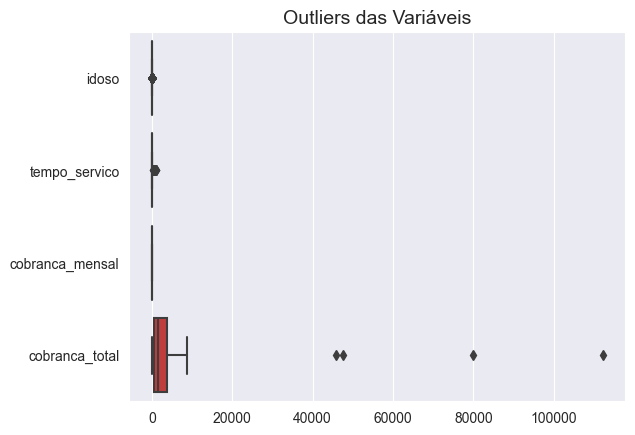

In [751]:
plt.title('Outliers das Variáveis', fontsize=14)
sns.boxplot(dados, orient='h')

<Axes: >

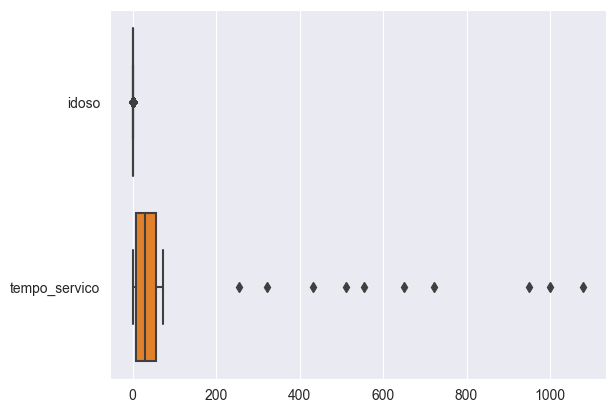

In [752]:
sns.boxplot(dados[['idoso', 'tempo_servico']], orient='h')

<Axes: >

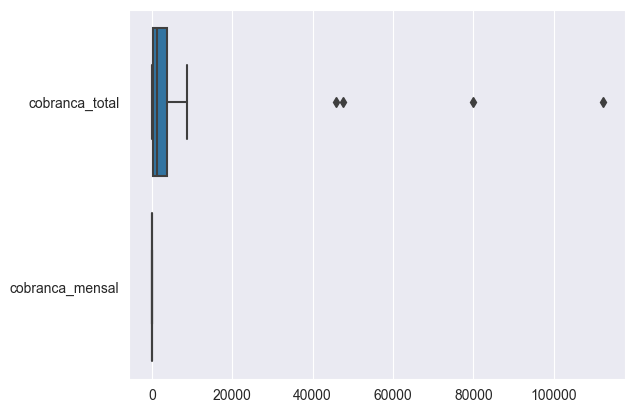

In [753]:
sns.boxplot(dados[['cobranca_total', 'cobranca_mensal']], orient='h')

In [754]:
dados[dados['tempo_servico'] > 40000]

,id_cliente,genero,idoso,parceiro,dependentes,tempo_servico,servico_telefone,varias_linhas,servico_internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_streaming,filmes_streaming,contrato,faturamente_eletronico,metodo_pagamento,cobranca_mensal,cobranca_total,churn


In [755]:
dados['tempo_servico'].quantile([0, .25, .5, .75, 1])

0.00       1.0
0.25       9.0
0.50      29.0
0.75      56.0
1.00    1080.0
Name: tempo_servico, dtype: float64

In [756]:
Q1 = dados['tempo_servico'].quantile(.25)
Q3 = dados['tempo_servico'].quantile(.75)
IIR = Q3 - Q1
limite_inferior = Q1 - 1.5*IIR
limite_superior = Q3 + 1.5*IIR

In [757]:
dados_index_outlires = dados[(dados['tempo_servico'] < limite_inferior) | (dados['tempo_servico'] > limite_superior)].index
dados_index_outlires

Index([1947, 1948, 1954, 1958, 1960, 1965, 1968, 1972, 1975, 1976], dtype='int64')

In [758]:
dados.loc[dados_index_outlires, 'tempo_servico'] = np.ceil(dados.loc[dados_index_outlires, 'cobranca_total'] / dados.loc[dados_index_outlires, 'cobranca_mensal'])

<Axes: xlabel='tempo_servico'>

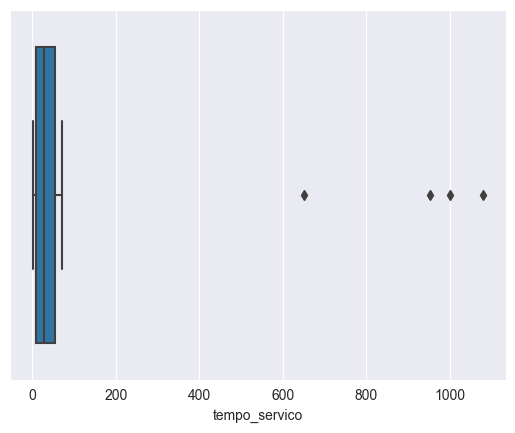

In [759]:
sns.boxplot(x=dados['tempo_servico'])

In [760]:
valores_apagar = dados[(dados['tempo_servico'] < limite_inferior) | (dados['tempo_servico'] > limite_superior)].index

In [761]:
dados.drop(valores_apagar, axis=0, inplace=True)

<Axes: >

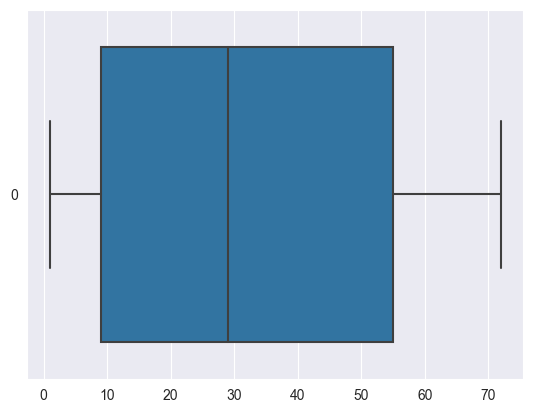

In [762]:
sns.boxplot(dados['tempo_servico'], orient='h')

In [763]:
dados.shape

(7015, 21)

<Axes: >

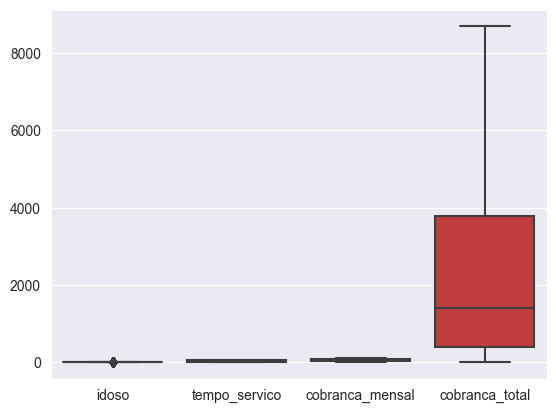

In [764]:
sns.boxplot(dados)

In [765]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7015 entries, 0 to 7018
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_cliente              7015 non-null   object 
 1   genero                  7015 non-null   object 
 2   idoso                   7015 non-null   int64  
 3   parceiro                7015 non-null   object 
 4   dependentes             7015 non-null   object 
 5   tempo_servico           7015 non-null   float64
 6   servico_telefone        7015 non-null   object 
 7   varias_linhas           7015 non-null   object 
 8   servico_internet        7015 non-null   object 
 9   seguranca_online        7015 non-null   object 
 10  backup_online           7015 non-null   object 
 11  protecao_dispositivo    7015 non-null   object 
 12  suporte_tecnico         7015 non-null   object 
 13  tv_streaming            7015 non-null   object 
 14  filmes_streaming        7015 non-null   objec

In [766]:
dados.shape

(7015, 21)

## Exercícios

In [767]:
import pandas as pd

# criando um DataFrame com 30 transações aleatórias
df = pd.DataFrame({
    'ID da transação': range(1, 31),
    'Valor da transação': [100, 200, 150, 500, 300, 913, 250, 400, 200, 150, 
                           200, 200, 400, 300, 150, 301, 805, 300, 400, 250, 
                           150, 100, 500, 600, 200, 350, 100, 250, 800, 250],
    'Data da transação': pd.date_range(start='2022-01-01', end='2022-01-30', freq='D'),
    'Local da transação': ['São Paulo, Brasil', 'Rio de Janeiro, Brasil', 'Belo Horizonte, Brasil', 'São Paulo, Brasil', 
                           'São Paulo, Brasil', 'Nova Iorque, EUA', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'Rio de Janeiro, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'São Paulo, Brasil', 'São Paulo, Brasil', 'Los Angeles, EUA', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'São Paulo, Brasil', 'São Paulo, Brasil', 'Miami, EUA', 'São Paulo, Brasil']
})

In [768]:
df.head()

,ID da transação,Valor da transação,Data da transação,Local da transação
0,1,100,2022-01-01,"São Paulo, Brasil"
1,2,200,2022-01-02,"Rio de Janeiro, Brasil"
2,3,150,2022-01-03,"Belo Horizonte, Brasil"
3,4,500,2022-01-04,"São Paulo, Brasil"
4,5,300,2022-01-05,"São Paulo, Brasil"


<Axes: >

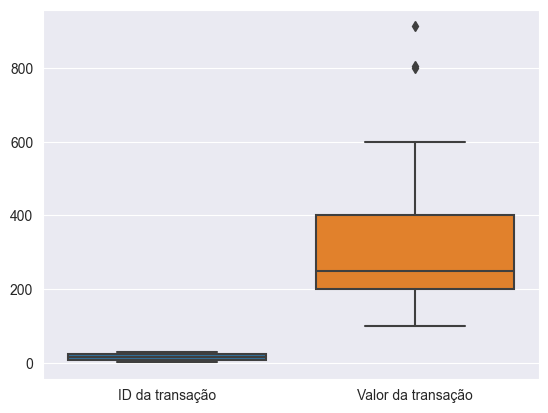

In [769]:
sns.boxplot(df)

In [770]:
def clear_outlier(coluna, df):
    # Fórmula
    Q1 = df[coluna].quantile(.25)
    Q3 = df[coluna].quantile(.75)
    IIR = Q3 - Q1
    limite_inferior = Q1 - 1.5*IIR
    limite_superior = Q3 + 1.0*IIR
    
    # Filtrando os outliers
    idx = df[(df[coluna] < limite_inferior) | (df[coluna] >= limite_superior)].index
    
    # Deletando do DataFrame
    df.drop(idx, axis=0, inplace=True)

    return df

In [771]:
novo_df = clear_outlier('Valor da transação', df)

In [772]:
novo_df.head()

,ID da transação,Valor da transação,Data da transação,Local da transação
0,1,100,2022-01-01,"São Paulo, Brasil"
1,2,200,2022-01-02,"Rio de Janeiro, Brasil"
2,3,150,2022-01-03,"Belo Horizonte, Brasil"
3,4,500,2022-01-04,"São Paulo, Brasil"
4,5,300,2022-01-05,"São Paulo, Brasil"


<Axes: >

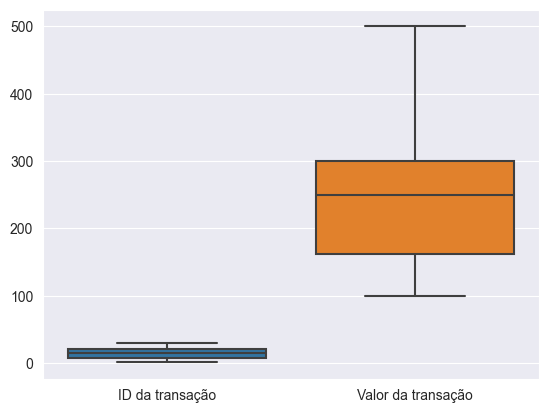

In [773]:
sns.boxplot(novo_df)

# ----------------------------------------------------------------------------------

# Trabalhando com variáveis categóricas

In [774]:
dados.head()

,id_cliente,genero,idoso,parceiro,dependentes,tempo_servico,servico_telefone,varias_linhas,servico_internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_streaming,filmes_streaming,contrato,faturamente_eletronico,metodo_pagamento,cobranca_mensal,cobranca_total,churn
0,0003-MKNFE,masculino,0,nao,nao,9.0,sim,sim,DSL,nao,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.9,542.40,nao
1,0004-TLHLJ,masculino,0,nao,nao,4.0,sim,nao,fibra otica,nao,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.9,280.85,sim
2,0011-IGKFF,masculino,1,sim,nao,13.0,sim,nao,fibra otica,nao,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.0,1237.85,sim
3,0013-EXCHZ,feminino,1,sim,nao,3.0,sim,nao,fibra otica,nao,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.9,267.40,sim
4,0013-MHZWF,feminino,0,nao,sim,9.0,sim,nao,DSL,nao,nao,nao,sim,sim,sim,mes a mes,sim,cartao de credito (automatico),69.4,571.45,nao


In [775]:
dados.shape

(7015, 21)

In [776]:
dados.drop('id_cliente', axis=1, inplace=True)

In [777]:
dados.head()

,genero,idoso,parceiro,dependentes,tempo_servico,servico_telefone,varias_linhas,servico_internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_streaming,filmes_streaming,contrato,faturamente_eletronico,metodo_pagamento,cobranca_mensal,cobranca_total,churn
0,masculino,0,nao,nao,9.0,sim,sim,DSL,nao,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.9,542.40,nao
1,masculino,0,nao,nao,4.0,sim,nao,fibra otica,nao,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.9,280.85,sim
2,masculino,1,sim,nao,13.0,sim,nao,fibra otica,nao,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.0,1237.85,sim
3,feminino,1,sim,nao,3.0,sim,nao,fibra otica,nao,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.9,267.40,sim
4,feminino,0,nao,sim,9.0,sim,nao,DSL,nao,nao,nao,sim,sim,sim,mes a mes,sim,cartao de credito (automatico),69.4,571.45,nao


In [779]:
for i in dados.columns:
    print(f'Coluna: {i}')
    print(f'{dados[i].unique()}')
    print('--'*20)

Coluna: genero
['masculino' 'feminino']
----------------------------------------
Coluna: idoso
[0 1]
----------------------------------------
Coluna: parceiro
['nao' 'sim']
----------------------------------------
Coluna: dependentes
['nao' 'sim']
----------------------------------------
Coluna: tempo_servico
[ 9.  4. 13.  3. 71. 63.  7. 66. 54. 72.  5. 56. 34.  1. 45. 50. 23. 55.
 26. 69. 37. 49. 67. 20. 43. 59. 12. 27.  2. 25. 29. 14. 35. 64. 39. 40.
 11.  6. 30. 70. 57. 58. 16. 32. 33. 10. 21. 61. 15. 44. 22. 24. 19. 47.
 62. 46. 52.  8. 60. 48. 28. 41. 53. 68. 31. 36. 17. 18. 65. 51. 38. 42.]
----------------------------------------
Coluna: servico_telefone
['sim' 'nao']
----------------------------------------
Coluna: varias_linhas
['sim' 'nao' 'sem servico de telefone']
----------------------------------------
Coluna: servico_internet
['DSL' 'fibra otica' 'nao']
----------------------------------------
Coluna: seguranca_online
['nao' 'sim' 'sem servico de internet']
-------------

In [780]:
dados.replace('sim', 1).replace('nao', 0).replace('sem servico de telefone', 0).replace('sem servico de internet', 0)

,genero,idoso,parceiro,dependentes,tempo_servico,servico_telefone,varias_linhas,servico_internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_streaming,filmes_streaming,contrato,faturamente_eletronico,metodo_pagamento,cobranca_mensal,cobranca_total,churn
0,masculino,0,0,0,9.0,1,1,DSL,0,0,0,0,0,1,mes a mes,0,cheque pelo correio,59.90,542.40,0
1,masculino,0,0,0,4.0,1,0,fibra otica,0,0,1,0,0,0,mes a mes,1,cheque eletronico,73.90,280.85,1
2,masculino,1,1,0,13.0,1,0,fibra otica,0,1,1,0,1,1,mes a mes,1,cheque eletronico,98.00,1237.85,1
3,feminino,1,1,0,3.0,1,0,fibra otica,0,0,0,1,1,0,mes a mes,1,cheque pelo correio,83.90,267.40,1
4,feminino,0,0,1,9.0,1,0,DSL,0,0,0,1,1,1,mes a mes,1,cartao de credito (automatico),69.40,571.45,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7014,feminino,0,0,0,13.0,1,0,DSL,1,0,0,1,0,0,um ano,0,cheque pelo correio,55.15,742.90,0
7015,masculino,0,1,0,22.0,1,1,fibra otica,0,0,0,0,0,1,mes a mes,1,cheque eletronico,85.10,1873.70,1
7016,masculino,0,0,0,2.0,1,0,DSL,0,1,0,0,0,0,mes a mes,1,cheque pelo correio,50.30,92.75,0
7017,masculino,0,1,1,67.0,1,0,DSL,1,0,1,1,0,1,dois anos,0,cheque pelo correio,67.85,4627.65,0


In [781]:
dados = dados.apply(lambda x: x.replace('nao', 0).replace('sim', 1).replace('sem servico de telefone', 0).replace('sem servico de internet', 0))

In [782]:
dados['idoso'] = dados['idoso'].astype(int)
dados['parceiro'] = dados['parceiro'].astype(int)
dados['dependentes'] = dados['dependentes'].astype(int)
dados['servico_telefone'] = dados['servico_telefone'].astype(int)
dados['varias_linhas'] = dados['varias_linhas'].astype(int)
dados['seguranca_online'] = dados['seguranca_online'].astype(int)
dados['backup_online'] = dados['backup_online'].astype(int)
dados['protecao_dispositivo'] = dados['protecao_dispositivo'].astype(int)
dados['suporte_tecnico'] = dados['suporte_tecnico'].astype(int)
dados['tv_streaming'] = dados['tv_streaming'].astype(int)
dados['filmes_streaming'] = dados['filmes_streaming'].astype(int)
dados['faturamente_eletronico'] = dados['faturamente_eletronico'].astype(int)
dados['churn'] = dados['churn'].astype(int)

In [783]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7015 entries, 0 to 7018
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   genero                  7015 non-null   object 
 1   idoso                   7015 non-null   int32  
 2   parceiro                7015 non-null   int32  
 3   dependentes             7015 non-null   int32  
 4   tempo_servico           7015 non-null   float64
 5   servico_telefone        7015 non-null   int32  
 6   varias_linhas           7015 non-null   int32  
 7   servico_internet        7015 non-null   object 
 8   seguranca_online        7015 non-null   int32  
 9   backup_online           7015 non-null   int32  
 10  protecao_dispositivo    7015 non-null   int32  
 11  suporte_tecnico         7015 non-null   int32  
 12  tv_streaming            7015 non-null   int32  
 13  filmes_streaming        7015 non-null   int32  
 14  contrato                7015 non-null   objec

In [784]:
dados

,genero,idoso,parceiro,dependentes,tempo_servico,servico_telefone,varias_linhas,servico_internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_streaming,filmes_streaming,contrato,faturamente_eletronico,metodo_pagamento,cobranca_mensal,cobranca_total,churn
0,masculino,0,0,0,9.0,1,1,DSL,0,0,0,0,0,1,mes a mes,0,cheque pelo correio,59.90,542.40,0
1,masculino,0,0,0,4.0,1,0,fibra otica,0,0,1,0,0,0,mes a mes,1,cheque eletronico,73.90,280.85,1
2,masculino,1,1,0,13.0,1,0,fibra otica,0,1,1,0,1,1,mes a mes,1,cheque eletronico,98.00,1237.85,1
3,feminino,1,1,0,3.0,1,0,fibra otica,0,0,0,1,1,0,mes a mes,1,cheque pelo correio,83.90,267.40,1
4,feminino,0,0,1,9.0,1,0,DSL,0,0,0,1,1,1,mes a mes,1,cartao de credito (automatico),69.40,571.45,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7014,feminino,0,0,0,13.0,1,0,DSL,1,0,0,1,0,0,um ano,0,cheque pelo correio,55.15,742.90,0
7015,masculino,0,1,0,22.0,1,1,fibra otica,0,0,0,0,0,1,mes a mes,1,cheque eletronico,85.10,1873.70,1
7016,masculino,0,0,0,2.0,1,0,DSL,0,1,0,0,0,0,mes a mes,1,cheque pelo correio,50.30,92.75,0
7017,masculino,0,1,1,67.0,1,0,DSL,1,0,1,1,0,1,dois anos,0,cheque pelo correio,67.85,4627.65,0


In [785]:
pd.get_dummies(dados, dtype=int)

,idoso,parceiro,dependentes,tempo_servico,servico_telefone,varias_linhas,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_streaming,filmes_streaming,faturamente_eletronico,cobranca_mensal,cobranca_total,churn,genero_feminino,genero_masculino,servico_internet_0,servico_internet_DSL,servico_internet_fibra otica,contrato_dois anos,contrato_mes a mes,contrato_tres anos e meio,contrato_um ano,contrato_um ano e meio,metodo_pagamento_cartao de credito (automatico),metodo_pagamento_cheque eletronico,metodo_pagamento_cheque pelo correio,metodo_pagamento_transferencia bancaria (automatica)
0,0,0,0,9.0,1,1,0,0,0,0,0,1,0,59.90,542.40,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0
1,0,0,0,4.0,1,0,0,0,1,0,0,0,1,73.90,280.85,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0
2,1,1,0,13.0,1,0,0,1,1,0,1,1,1,98.00,1237.85,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0
3,1,1,0,3.0,1,0,0,0,0,1,1,0,1,83.90,267.40,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0
4,0,0,1,9.0,1,0,0,0,0,1,1,1,1,69.40,571.45,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7014,0,0,0,13.0,1,0,1,0,0,1,0,0,0,55.15,742.90,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0
7015,0,1,0,22.0,1,1,0,0,0,0,0,1,1,85.10,1873.70,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0
7016,0,0,0,2.0,1,0,0,1,0,0,0,0,1,50.30,92.75,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0
7017,0,1,1,67.0,1,0,1,0,1,1,0,1,0,67.85,4627.65,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0


In [789]:
dados = pd.get_dummies(dados, dtype=int, drop_first=True)

In [790]:
dados.shape

(7015, 30)